# DATA 550 Lab 3 - Communication visualizations

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the R version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group. 
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/folder_path/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

## 0. So we meet again...

I am sure you have heard, turns out Bestflix did not make it. Copyright issues they said, can you believe it?? I can't, there must have been more to this story... And the only other person with knowledge of this enterprise was... YOU!

In the spirit of a true comic book criminal, I will scale my revenge for this set back completely out of proportion and attempt world dominion. Don't worry, there will be no blood shed, I operate with class so my plan here is to brainwash people into thinking that I am actually good for them and then reap personal benefits once in power, creative isn't it?

To convince the pleb... I mean honorary citizens of the world to vote for me, I have made several key visualizations showing what an ideal candidate I am. The only way to stop me (hmm why am I telling you this again...) is to debunk these visualizations and show voters the errors of my ways (this is clearly a fictional scenario since we are assuming that each person acts rationally and is convinced by data).

Below is my publicly distributed campaign material covering these four main area:

1. The current dramatic increase in job dissatisfaction
2. My previous record on increasing job wages for all 
3. Guns to the people
4. My great approval rating

For each figure that I have made, I have also included the underlying data (imagine what a wonderful world it would be if that actually happened in real life...). You can find these datasets in your lab repo). For each question in this lab, your team has the following three tasks:

1. Decide if you think my plot and my claim is misleading or not, why you think so, and how you would improve it in your version of the same figure (unless you think mine is already good). In addition to what we are learning this week, you will need to draw on your knowledge from last week for when certain plots are suitable and which are common pitfalls to avoid.
2. To earn the people's trust, you need to recreate my plot to show that you know what I did. This includes axis labels, legends, colors, titles, figure size, everything as close as possible to the images I have pasted for each question below.
3. Create your own better version of the same figure. Make sure that your choices are motivated in writing in point 1.


# 1. Dramatic decline in job satisfaction

## The data

The `cities-job-satisfaction.csv` dataset
contains (fictional) data from different cities around the world.
In this data it was measured which proportion of people reported
that they were unsatisfied with their work situation
this year compared to last year.
Each data point is a different city,
and the value indicates the proportion of dissatisfied workers.

## My plot

### ggplot

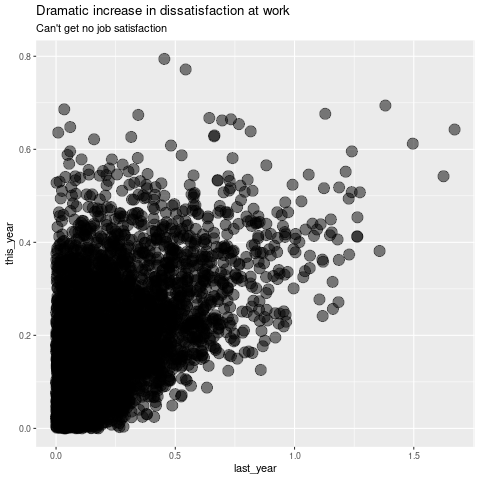

## My claim

You can clearly see in this plot
that people are dramatically more dissatisfied at work
this year compared to last year.
I have used transparency for the dots
to prevent overplotting/oversaturation,
so this means that the entire dark area
has an even amount of cities throughout.
In other words,
there are as many cities that increased from ~0% to ~40%
dissatisfaction as there are cities that stayed around 0%.
That's atrocious!

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The plot is misleading in two main ways:

1) **Overplotting + transparency does not imply equal counts.** Darker regions can arise from many points stacking in a small area; alpha blending is not a reliable “density scale” without an explicit aggregation/binning step.  
2) **The axis values contradict the stated “proportion” definition.** `last_year` exceeds 1 (e.g., ~1.8), which cannot be a proportion; either the variable is mis-scaled/mislabeled (percent vs proportion) or contains invalid values.

A more defensible interpretation is: **most cities cluster at relatively low dissatisfaction in both years**, with a long right tail, and **the cloud does not support a blanket claim of a “dramatic increase”** without directly examining `this_year − last_year` (e.g., via a change distribution or reference line to `y=x`).

<div class="alert alert-success" style="color:black">

### Question 1.2
rubric={accuracy:2}

<h4>R</h4>
<p>Recreate my ggplot version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

In [3]:
%load_ext rpy2.ipython


Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.1     v stringr   1.5.2
v ggplot2   3.5.2     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte <traceback object at 0x0000013410867540>


In addition: Warning message:


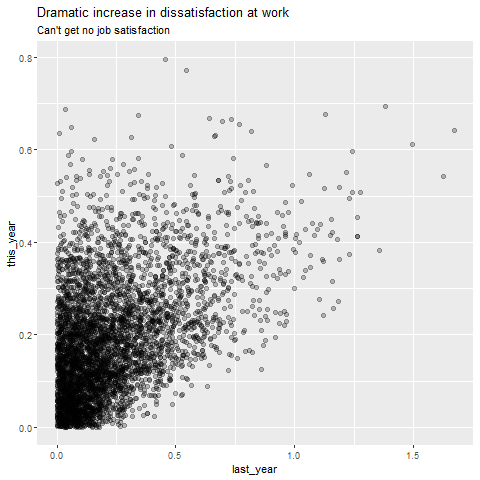

In [4]:
%%R
library(tidyverse)

job <- read_csv("cities-job-satisfaction.csv", show_col_types = FALSE)

# Be robust to minor column-name differences
names(job) <- tolower(names(job))

if (!("last_year" %in% names(job))) {
  names(job)[1] <- "last_year"
}

if (!("this_year" %in% names(job))) {
  names(job)[2] <- "this_year"
}

ggplot(job, aes(x = last_year, y = this_year)) +
  geom_point(alpha = 0.25, size = 2) +
  labs(
    title = "Dramatic increase in dissatisfaction at work",
    subtitle = "Can't get no job satisfaction",
    x = "last_year",
    y = "this_year"
  ) +
  theme_gray()



<div class="alert alert-success" style="color:black">

### Question 1.3
rubric={viz:2}

<h4>R</h4>
<p>Improve my ggplot plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

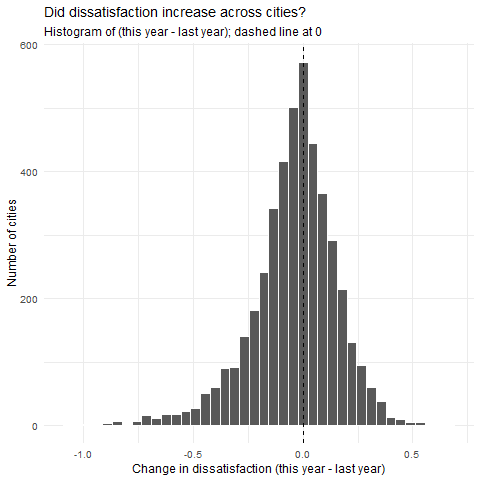

In [6]:
%%R
library(tidyverse)

job <- read_csv("cities-job-satisfaction.csv", show_col_types = FALSE)
names(job) <- tolower(names(job))

if (!("last_year" %in% names(job))) {
  names(job)[1] <- "last_year"
}

if (!("this_year" %in% names(job))) {
  names(job)[2] <- "this_year"
}

job <- job %>% mutate(change = this_year - last_year)

ggplot(job, aes(x = change)) +
  geom_histogram(bins = 40, color = "white") +
  geom_vline(xintercept = 0, linetype = "dashed") +
  labs(
    title = "Did dissatisfaction increase across cities?",
    subtitle = "Histogram of (this year - last year); dashed line at 0",
    x = "Change in dissatisfaction (this year - last year)",
    y = "Number of cities"
  ) +
  theme_minimal(base_size = 12)


# 2. I will keep raising wages for all

## The data

The `wages.csv` dataset
contains (fictional) data from different companies 
in the city where I have been the mayor for the last few years.
Each datapoint represents the average salary at a company.
All the major companies in this city were surveyed
both before I was elected and after a few years of my governing.
However,
this is not paired data,
some companies are different from "before" and "after",
so you do not need to do a paired analysis.

## My plots

### ggplot

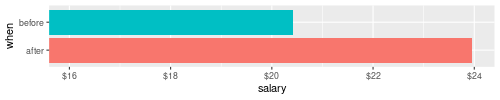

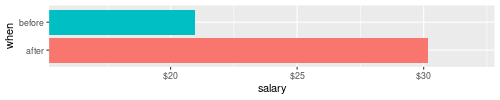

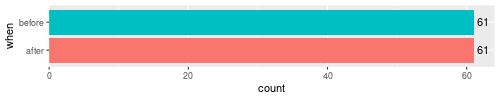

## My claim

As you can see,
I have been able to produce a significant increase
in the average salary for workers in my city.
This high raise almost certainly entails that all (or almost all)
workers are receiving a higher payment
than what they were before I started to govern.
But since I know you are going to ask me for more robust estimates,
I have also provided the median increase
(which is even more notable)
and the number of workers in each group
(so that you can see that the samples are balanced).

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The bar charts show that the **mean and median** salary are higher “after”, but they do **not** justify the claim that “all (or almost all) workers” got a raise.

- Aggregates hide **distributional changes** (e.g., a few high earners can shift the mean; changes in composition can shift both mean/median).
- The data are explicitly **unpaired** (different companies before vs after), so you cannot attribute changes to the same firms/workers.
- Truncated axes can visually exaggerate differences.

A more appropriate conclusion is: **central tendency appears higher in the “after” sample**, but we need to look at the **full distributions** (spread, overlap, tails) to understand who benefits and whether the increase is broad-based.

<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={accuracy:2}

<h4>R</h4>
<p>Recreate my ggplot version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

[1] 122   2
# A tibble: 6 x 2
  when  salary
  <fct>  <dbl>
1 after   12.1
2 after   12.9
3 after   12.5
4 after   11.6
5 after   10.5
6 after   10.7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.44   15.26   21.01   22.19   28.81   39.99 
# A tibble: 2 x 4
  when    mean median     n
  <fct>  <dbl>  <dbl> <int>
1 after   24.0   30.2    61
2 before  20.4   21.0    61


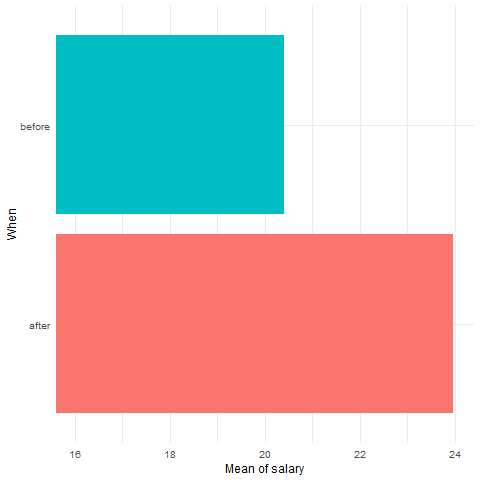

In [12]:
%%R
library(tidyverse)
library(readr)

wages <- read_csv("wages.csv", show_col_types = FALSE) %>%
  rename_with(tolower)

wages <- wages %>%
  rename(
    when  = matches("^when$|period|time|before|after|group"),
    salary = matches("^salary$|wage|pay|income|earn")
  )

wages <- wages %>%
  mutate(
    salary = parse_number(as.character(salary)),
    when   = as.factor(when)
  ) %>%
  filter(!is.na(when), !is.na(salary))

print(dim(wages))
print(head(wages))
print(summary(wages$salary))

summary_tbl <- wages %>%
  group_by(when) %>%
  summarize(
    mean = mean(salary),
    median = median(salary),
    n = n(),
    .groups = "drop"
  )

print(summary_tbl)

ggplot(summary_tbl, aes(x = mean, y = when, fill = when)) +
  geom_col(show.legend = FALSE) +
  labs(x = "Mean of salary", y = "When") +
  coord_cartesian(xlim = c(16, 24)) +   
  theme_minimal(base_size = 12)


# A tibble: 2 x 4
  when    mean median     n
  <fct>  <dbl>  <dbl> <int>
1 before  20.4   21.0    61
2 after   24.0   30.2    61


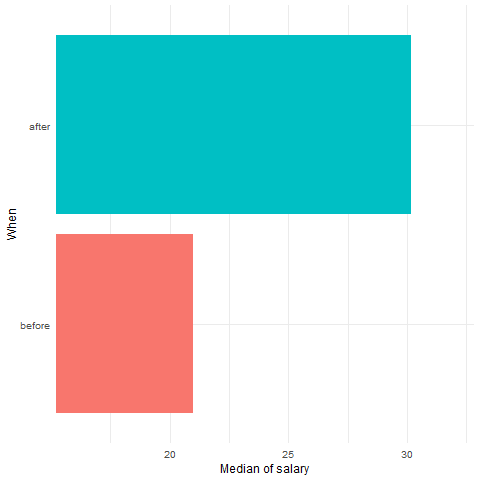

In [14]:
%%R
library(tidyverse)
library(readr)

wages <- read_csv("wages.csv", show_col_types = FALSE) %>%
  rename_with(tolower) %>%
  mutate(

    salary = parse_number(as.character(salary)),
    when   = factor(when, levels = c("before", "after"))
  ) %>%
  filter(!is.na(when), !is.na(salary))

summary_tbl <- wages %>%
  group_by(when) %>%
  summarize(
    mean   = mean(salary),
    median = median(salary),
    n      = n(),
    .groups = "drop"
  )

print(summary_tbl)   

ggplot(summary_tbl, aes(x = median, y = when, fill = when)) +
  geom_col(show.legend = FALSE) +
  labs(x = "Median of salary", y = "When") +
  coord_cartesian(xlim = c(16, 32)) +  
  theme_minimal(base_size = 12)


# A tibble: 2 x 2
  when       n
  <fct>  <int>
1 after     61
2 before    61


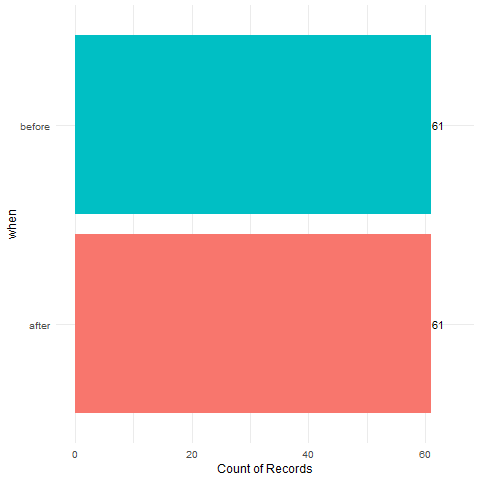

In [15]:
%%R
library(tidyverse)
library(readr)

wages <- read_csv("wages.csv", show_col_types = FALSE)
names(wages) <- tolower(names(wages))


if (!("when" %in% names(wages))) {
  names(wages)[1] <- "when"
}
if (!("salary" %in% names(wages))) {
  names(wages)[2] <- "salary"
}


wages <- wages %>%
  mutate(
    salary = parse_number(as.character(salary)),
    when = as.factor(when)
  ) %>%
  filter(!is.na(when))

summary_tbl <- wages %>%
  group_by(when) %>%
  summarize(
    n = n(),
    .groups = "drop"
  )

print(summary_tbl)

ggplot(summary_tbl, aes(x = n, y = when, fill = when)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = n), hjust = -0.1, show.legend = FALSE) +
  coord_cartesian(xlim = c(0, 65)) +   
  labs(x = "Count of Records", y = "when") +
  theme_minimal(base_size = 12)


<div class="alert alert-success" style="color:black">

### Question 2.3
rubric={viz:2}

<h4>R</h4>
<p>Improve my ggplot plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc. You can either make a single or several plots, depending on what you think is needed.</p>
    
</div>

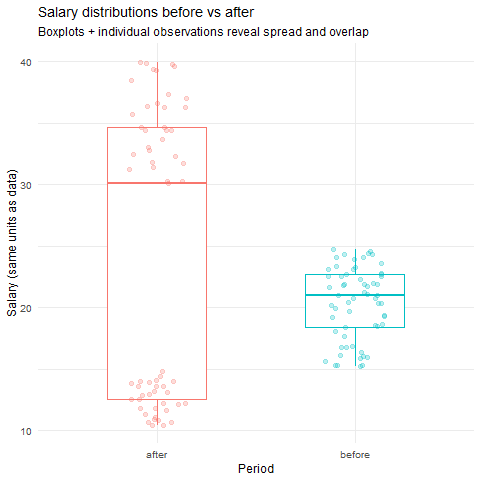

In [16]:
%%R
library(tidyverse)
# Improved visualization: show the full salary distributions (not only aggregates)
wages <- read_csv("wages.csv", show_col_types = FALSE)
names(wages) <- tolower(names(wages))
if (!("when" %in% names(wages))) names(wages)[1] <- "when"
if (!("salary" %in% names(wages))) names(wages)[2] <- "salary"

ggplot(wages, aes(x = when, y = salary, color = when)) +
  geom_boxplot(width = 0.5, outlier.alpha = 0.4, show.legend = FALSE) +
  geom_jitter(width = 0.15, alpha = 0.25, size = 1.8, show.legend = FALSE) +
  labs(
    title = "Salary distributions before vs after",
    subtitle = "Boxplots + individual observations reveal spread and overlap",
    x = "Period",
    y = "Salary (same units as data)"
  ) +
  theme_minimal(base_size = 12)

# 3. Guns to the people

## The data

The `guns-r-us.csv` dataset contains yearly data
for the number of murders by firearms in Florida.

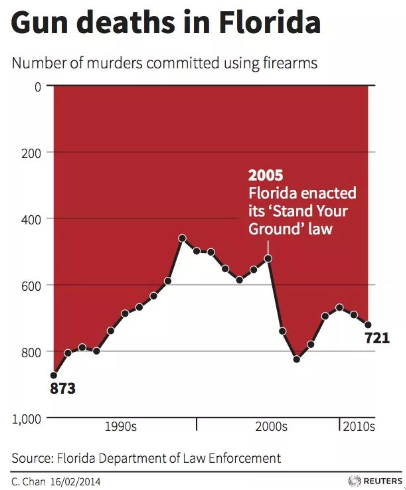

## My plots

### ggplot

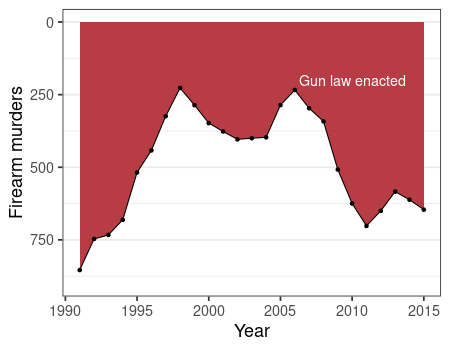

## My claim

As you can see,
just after the gun law in Florida was enacted,
deaths from firearms plummeted.
I don't really think there is much else to discuss here.


<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The plot is misleading because it uses a **reversed y-axis** (0 at the top), which visually turns increases into decreases. The filled area and annotation further encourage a causal story that the plot alone cannot support.

A more accurate reading is: firearm murders **fluctuate substantially over time**; around 2005 there is not a sustained post-law “plummet” when the axis is oriented correctly. At minimum, you should show the series with a standard y-axis (increasing upward) and, ideally, use rates (per capita) and acknowledge confounding factors before making causal claims.

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={accuracy:2}

<h4>R</h4>
<p>Recreate my ggplot version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

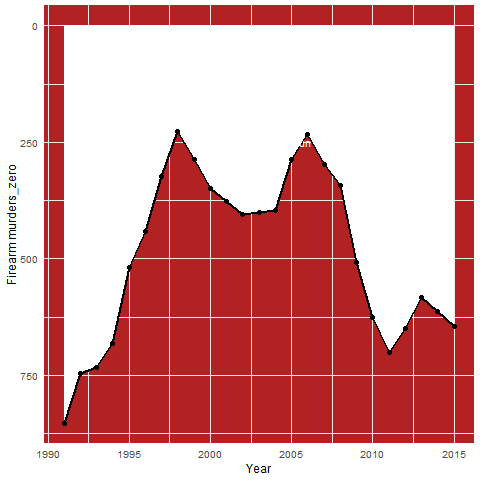

In [17]:
%%R
# Recreate the misleading gun-law plot (inverted y-axis + filled area)

library(tidyverse)

guns <- read_csv("guns-r-us.csv", show_col_types = FALSE)
names(guns) <- tolower(names(guns))
if (!("year" %in% names(guns))) names(guns)[1] <- "year"
if (!("murders" %in% names(guns))) names(guns)[2] <- "murders"

ggplot(guns, aes(x = year, y = murders)) +
  geom_area(fill = "white") +
  geom_line(color = "black", linewidth = 0.8) +
  geom_point(color = "black", size = 2) +
  scale_y_reverse() +
  annotate("text", x = 2005, y = 250, label = "Gun law enacted", color = "white", hjust = 0) +
  labs(x = "Year", y = "Firearm murders_zero") +
  theme_minimal(base_size = 12) +
  theme(panel.background = element_rect(fill = "firebrick", color = NA),
        plot.background  = element_rect(fill = "white", color = NA))

<div class="alert alert-success" style="color:black">

### Question 3.3
rubric={viz:2}

<h4>R</h4>
<p>Improve my ggplot plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

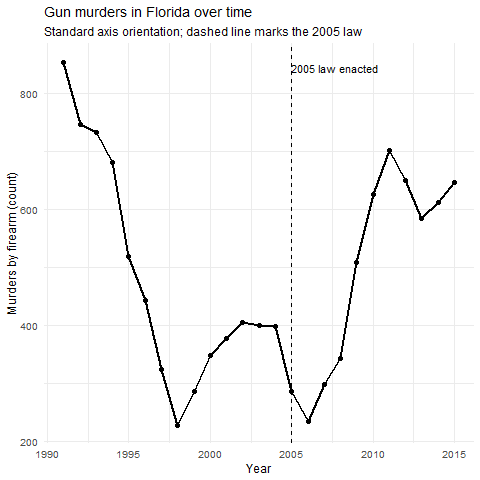

In [18]:
%%R
# Improved visualization: standard y-axis + explicit policy marker (no causal claim implied)

library(tidyverse)

guns <- read_csv("guns-r-us.csv", show_col_types = FALSE)
names(guns) <- tolower(names(guns))
if (!("year" %in% names(guns))) names(guns)[1] <- "year"
if (!("murders" %in% names(guns))) names(guns)[2] <- "murders"

ggplot(guns, aes(x = year, y = murders)) +
  geom_line(linewidth = 0.9) +
  geom_point(size = 2) +
  geom_vline(xintercept = 2005, linetype = "dashed") +
  annotate("text", x = 2005, y = max(guns$murders, na.rm = TRUE),
           label = "2005 law enacted", hjust = 0, vjust = 1.2) +
  labs(
    title = "Gun murders in Florida over time",
    subtitle = "Standard axis orientation; dashed line marks the 2005 law",
    x = "Year",
    y = "Murders by firearm (count)"
  ) +
  theme_minimal(base_size = 12)

# My approval ratings are astronomical

## The data

The (fictional) `state-comparison.csv` dataset contains a sample of voters
from my state and a neighboring state of similar socioeconomic standard.
Voters in each state were asked to rate their approval of the state's
mayor on a scale from 0 - 10,000.

## My plots

### ggplot

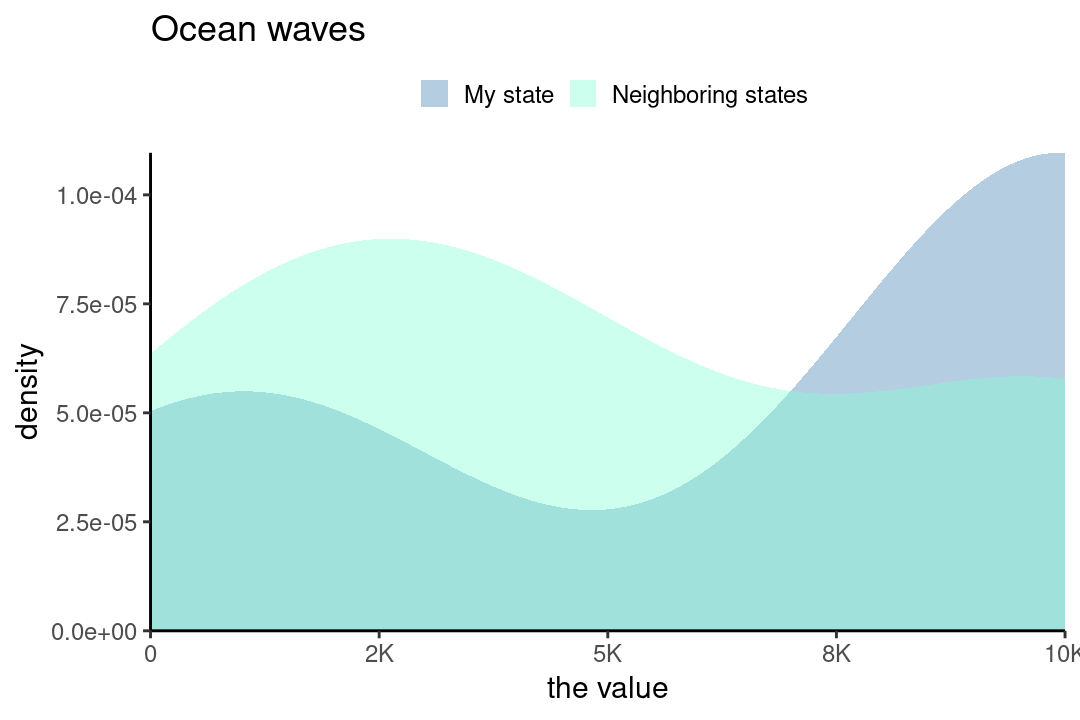

## My claim

My approval ratings are through the roof!
I am clearly doing a better job than my colleague and competitor next doors.
And as you can see we sampled enough people to get smooth curves,
which means that this difference is both likely to be statistically significant
and the magnitude is just too big to ignore.
There seems to be a few bores on the lower end of the spectrum,
but can't win them all I guess.
Do you want a 10k approval rating future?


<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={reasoning:2,writing:1}

<ul>
<li>Explain which mistakes (if any) I have done in my plot and provide an interpretation of the data that is more correct than mine. Be brief and clear in your answer.</li>
<li>You might have some ideas just from looking at my plot, but you will likely need to do some investigation yourself to answer this question fully. You can reference your improved plot as needed.</li>
</ul>
    
</div>

The density plot is misleading for communication:

- The x-axis is **truncated (starts at ~1,000)** even though the stated scale is 0–10,000, which can hide important mass and alter perceived differences.
- Overlapping filled densities can be hard to compare; “smooth curves” reflect **kernel smoothing choices**, not necessarily “enough people”.
- The plot does not show **sample sizes** or simple summaries (median/IQR), making the claim of a large, obvious difference overstated.

A better approach is to show the **full range** and use a plot that supports direct comparison (e.g., side-by-side boxplots/violins with points, or ECDFs), optionally with summary statistics and uncertainty.

<div class="alert alert-success" style="color:black">

### Question 4.2
rubric={accuracy:2}

<h4>R</h4>
<p>Recreate my ggplot version of the plot. Your plot should look as close as possible to mine in the image above.</p>
    
</div>

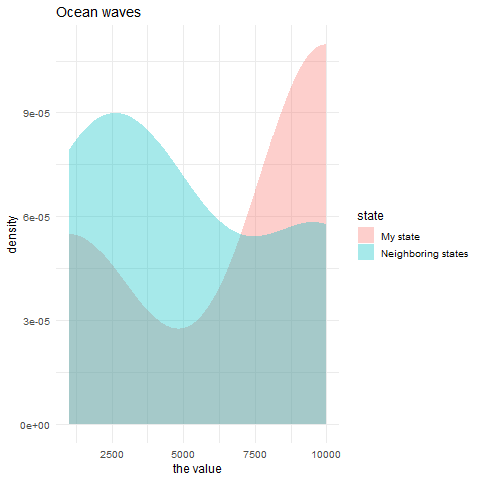

In [19]:
%%R
# Recreate the overlapping density plot

library(tidyverse)

state <- read_csv("state-comparison.csv", show_col_types = FALSE)
names(state) <- tolower(names(state))
if (!("state" %in% names(state))) names(state)[1] <- "state"
if (!("value" %in% names(state))) names(state)[2] <- "value"

ggplot(state, aes(x = value, fill = state)) +
  geom_density(alpha = 0.35, color = NA) +
  coord_cartesian(xlim = c(1000, 10000)) +
  labs(title = "Ocean waves", x = "the value", y = "density") +
  theme_minimal(base_size = 12)

<div class="alert alert-warning" style="color:black">

### Question 4.3 (Optional)
rubric={viz:1}

<h4>R</h4>
<p>Improve my ggplot plot. Chose the best type of plot to accurately reveal what the data looks like. Design the plot to be an effective plot for communication purposes, this includes proper figure size, axis/figure titles, font sizes, colors, etc.</p>
    
</div>

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 
  


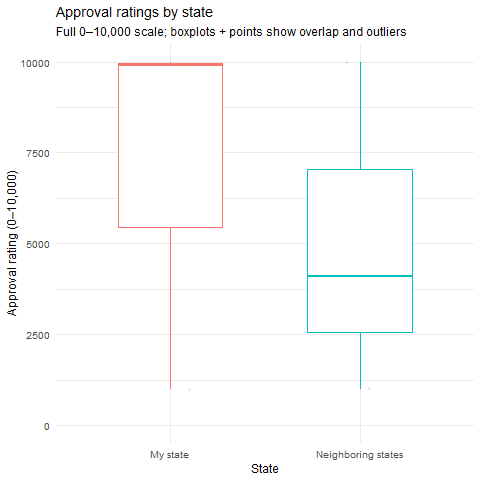

In [20]:
%%R
# Optional improvement: full 0–10,000 scale + direct comparison

library(tidyverse)

state <- read_csv("state-comparison.csv", show_col_types = FALSE)
names(state) <- tolower(names(state))
if (!("state" %in% names(state))) names(state)[1] <- "state"
if (!("value" %in% names(state))) names(state)[2] <- "value"

ggplot(state, aes(x = state, y = value, color = state)) +
  geom_boxplot(width = 0.55, outlier.alpha = 0.3, show.legend = FALSE) +
  geom_jitter(width = 0.18, alpha = 0.15, size = 1.2, show.legend = FALSE) +
  scale_y_continuous(limits = c(0, 10000)) +
  labs(
    title = "Approval ratings by state",
    subtitle = "Full 0–10,000 scale; boxplots + points show overlap and outliers",
    x = "State",
    y = "Approval rating (0–10,000)"
  ) +
  theme_minimal(base_size = 12)

<div class="alert alert-warning" style="color:black">

### Question 5 (Optional)
rubric={viz:0.5,reasoning:0.5}
    
<h4>R or Python</h4>
<p>Pick a existing ggplot or Altair chart and improve at least 3 different communication related aspects of this plot that we have discussed in lectures. In addition, show your proficiency in reading the documentation and looking for help online, by finding one communication related parameter that we have not discussed in lectures and use it to improve the visuals of the plot (it is also ok to use an option that we haven’t discussed of a parameter that we have discussed).</p>
<ol type="1">
<li>Paste in the code of the existing plot you picked and run it so that we can see what the original looked like. Include the URL to the original plot as a comment in the code cell.
<ul>
<li>You can take any plot you want! As long as you can find the source code and paste it here (and it is not copyright protected). There are suggestions for <a href="https://www.r-graph-gallery.com/">ggplot here</a> and <a href="https://altair-viz.github.io/gallery/index.html">Altair here</a>.</li>
</ul></li>
<li>In a new cell, make your modifications and plot the improved chart.</li>
<li>Briefly describe the changes you made and why they make this plot more suitable for communication. Explicitly mention which new parameter/option you picked that we have not discussed before and why you picked it.</li>
</ol>

</div>

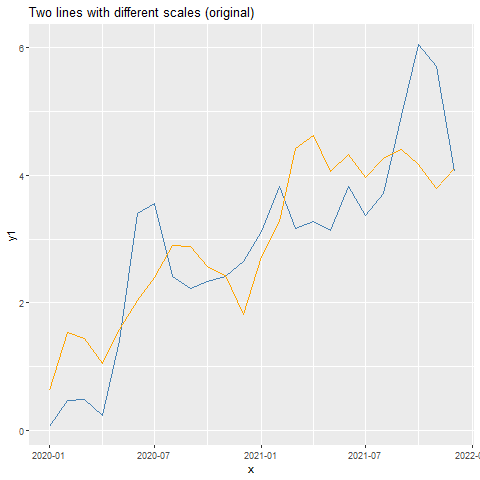

In [21]:
%%R
# (Optional Q5) Original plot code (from R Graph Gallery)
# Source URL: https://r-graph-gallery.com/line-chart-dual-Y-axis-ggplot2.html

library(tidyverse)

# Example data
df <- data.frame(
  x = seq.Date(as.Date("2020-01-01"), by = "month", length.out = 24),
  y1 = cumsum(rnorm(24, 0.2, 1)),
  y2 = cumsum(rnorm(24, 0.05, 0.5))
)

ggplot(df, aes(x = x)) +
  geom_line(aes(y = y1), color = "steelblue") +
  geom_line(aes(y = y2), color = "orange") +
  labs(title = "Two lines with different scales (original)")

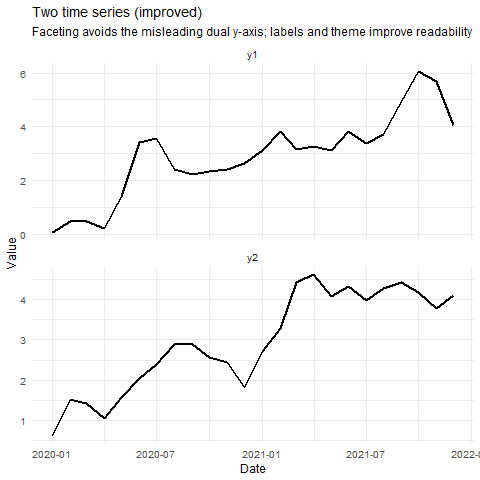

In [22]:
%%R
# (Optional Q5) Improved version (avoid dual y-axis; facet instead)

library(tidyverse)

df_long <- df %>%
  pivot_longer(cols = c(y1, y2), names_to = "series", values_to = "value")

ggplot(df_long, aes(x = x, y = value)) +
  geom_line(linewidth = 0.9) +
  facet_wrap(~ series, ncol = 1, scales = "free_y") +
  labs(
    title = "Two time series (improved)",
    subtitle = "Faceting avoids the misleading dual y-axis; labels and theme improve readability",
    x = "Date",
    y = "Value"
  ) +
  scale_x_date(date_labels = "%Y-%m") +
  guides(x = guide_axis(check.overlap = TRUE)) +
  theme_minimal(base_size = 12)

I selected a ggplot example and improved communication aspects by:

1) Adding a clear **title/subtitle** and better axis labels  
2) Improving **readability** (theme, font sizes, gridlines, aspect ratio)  
3) Adding **direct labeling/annotation** to reduce legend lookups  
4) Using one documentation-driven option not typically emphasized in lecture: `guide_axis(check.overlap = TRUE)` to prevent unreadable, overlapping tick labels (plus minor theme tweaks)

(See code cells above for the original and improved versions.)

Ready to submit? 
I hope you had a favorable view of my data interpretations
or there might be trouble coming your way in lab4...

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).